# SPSA vs. Other optimization methods

In [1]:
# have to be run only once to have the project root directory as CWD
import os
os.chdir("..")

In [2]:
# Imports
from experiments.algorithms import *
import experiments.mountain_car.moutain_car as rl 
import experiments.linear_regression.linear_regression as lr
import experiments.linear_regression.plot as lr_plot
import experiments.soft_kmeans.kmeans as kmeans
import experiments.soft_kmeans.plot as kmeans_plot

%load_ext autoreload 
%autoreload 2

Creating 5 blobs


## 1. Linear Regression 

Using SPSA
[2. 3.]


Performing gradient descent: 100%|██████████| 1000/1000 [00:00<00:00, 11664.00iteration/s]

Final parameters (spsa):
Loss: 0.155995
Param Error: 0.093386


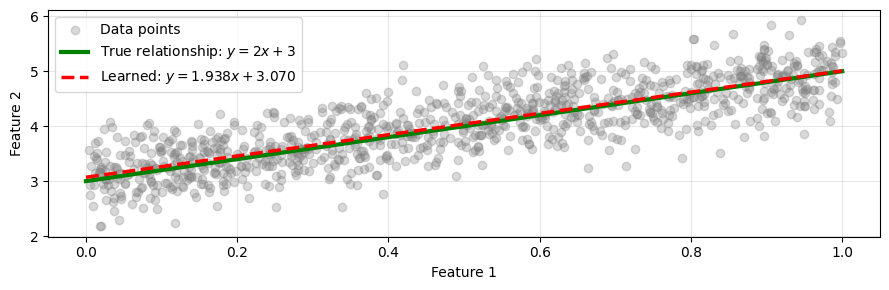

{'analytical': 'experiments/linear_regression/results/analytical_1D.json', 'spsa': 'experiments/linear_regression/results/spsa_1D.json', 'multi-point': 'experiments/linear_regression/results/multi-point_1D.json'}
dict_keys(['analytical', 'spsa', 'multi-point'])


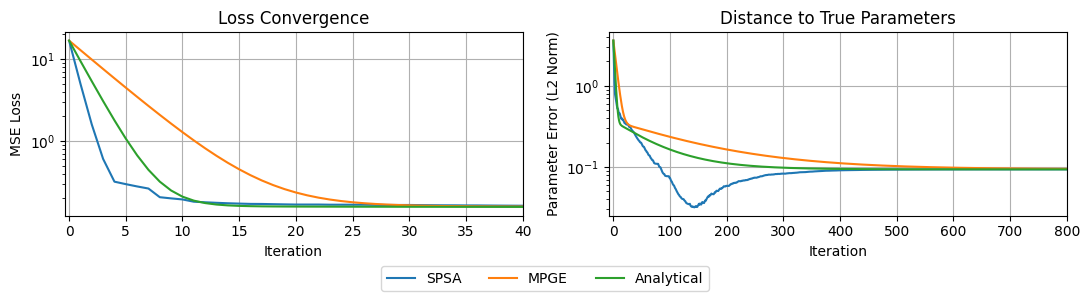

In [3]:
# METHOD AND PARAMETERS HAVE TO BE CHANGED INSIDE THE RELEVANT SCRIPTS
# getting results
lr.main()
# plotting them
lr_plot.main()

## 2. K-Means

Using SPSA
Problem shape is (10,)


Performing gradient descent:   0%|          | 0/10000 [00:00<?, ?iteration/s]

Performing gradient descent: 100%|██████████| 10000/10000 [00:05<00:00, 1745.67iteration/s]


Final cluster centers:
[[ -1.34669278   0.45766023]
 [ -6.38168963  -8.1594254 ]
 [-10.84419637   7.87903746]
 [  5.21808511   3.17566613]
 [ -0.56346052  11.1024415 ]]
Final objective value: 4099.9383


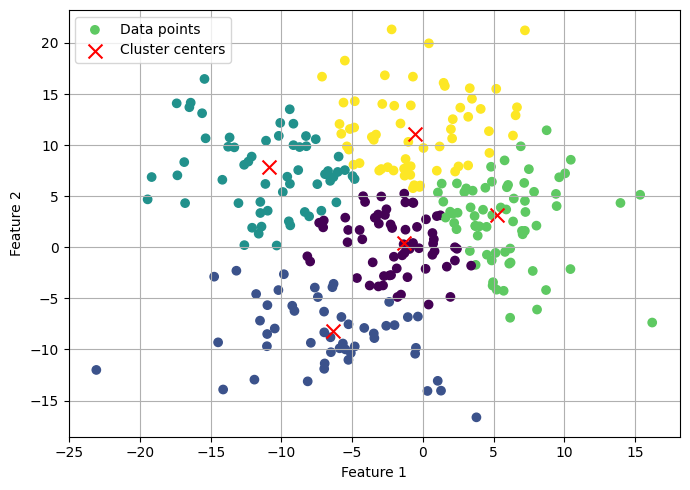

Computing the loss: 100%|██████████| 10001/10001 [00:02<00:00, 3915.26x/s]


Final loss: 4099.938264329006


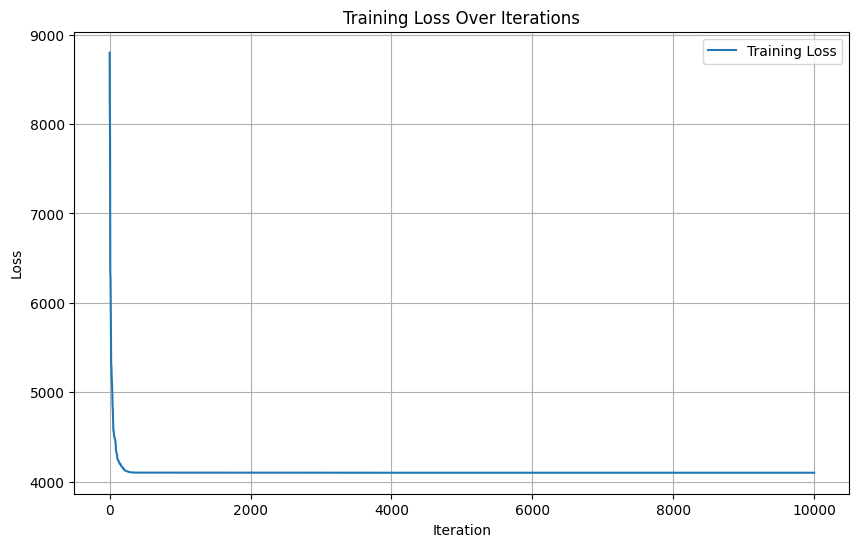

{'spsa': 'experiments/soft_kmeans/results/spsa_2D.json', 'analytical': 'experiments/soft_kmeans/results/analytical_2D.json', 'multi-point': 'experiments/soft_kmeans/results/multi-point_2D.json'}
dict_keys(['spsa', 'analytical', 'multi-point'])


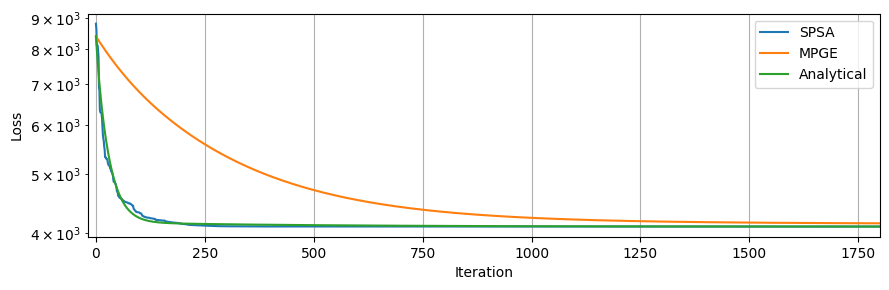

In [4]:
# METHOD AND PARAMETERS HAVE TO BE CHANGED INSIDE THE RELEVANT SCRIPTS
# getting results
kmeans.main()
# plotting them
kmeans_plot.main()

## 3. Reinforcement Learning (Mountain Car)

In [32]:
net = rl.MLPPolicy()
num_params = net.get_params().size
num_params

51

This means that Multipoint Gradient Estimator takes about ~51x longer than SPSA to estimate the gradient!

Let's perform a grid-search on the hyperparameters of SPSA. (Unfortunately, MPGE never reaches the goal no matter the hyperparameters.)

In [33]:
iterations = 500
alpha_list = [1.0, 0.5, 0.25]
K_list = [10.0, 5.0, 2.5]

spsa_histories, spsa_best_params = rl.grid_search(iterations, spsa_gradient, alpha_list, K_list)

--- GRID SEARCH ---
--------------------------------------------

### Training for alpha=1.0, K=10.0 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 1 - New best reward: -187.96
Step 2 - New best reward: -184.45
Step 8 - New best reward: -180.83
Step 10 - New best reward: -166.79
Step 26 - New best reward: -165.26
Step 88 - New best reward: -162.38
Step 161 - New best reward: -157.03
Step 202 - New best reward: -153.00
Step 204 - New best reward: -151.64


--------------------------------------------

### Training for alpha=1.0, K=5.0 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.74
Step 1 - New best reward: -188.52
Step 2 - New best reward: -181.26
Step 14 - New best reward: -174.49
Step 19 - New best reward: -172.52
Step 60 - New best reward: -170.55
Step 74 - New best reward: -168.29
Step 77 - New best reward: -162.51
Step 86 - New best reward: -160.59
Step 88 - New best reward: -157.91
Step 103 - New best reward: -154.51
Step 202 - New best reward: -151.81
Step 204 - New best reward: -150.51
Step 239 - New best reward: -149.57
Step 339 - New best reward: -148.24
Step 347 - New best reward: -146.68
Step 352 - New best reward: -28.98
Step 358 - New best reward:  4.81
Step 367 - New best reward:  6.84
Step 368 - New best reward:  8.08
Step 424 - New best reward:  11.48


--------------------------------------------

### Training for alpha=1.0, K=2.5 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 2 - New best reward: -181.26
Step 11 - New best reward: -179.38
Step 60 - New best reward: -176.44


--------------------------------------------

### Training for alpha=0.5, K=10.0 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 1 - New best reward: -187.41
Step 3 - New best reward: -186.96
Step 4 - New best reward: -186.55
Step 12 - New best reward: -185.36
Step 17 - New best reward: -183.40


--------------------------------------------

### Training for alpha=0.5, K=5.0 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 1 - New best reward: -187.59
Step 3 - New best reward: -186.91
Step 4 - New best reward: -184.10
Step 8 - New best reward: -183.91
Step 9 - New best reward: -183.54
Step 10 - New best reward: -172.50
Step 12 - New best reward: -169.17
Step 28 - New best reward: -168.97
Step 33 - New best reward: -164.61
Step 37 - New best reward: -157.96
Step 46 - New best reward: -157.27
Step 53 - New best reward: -156.18
Step 59 - New best reward: -15.94
Step 60 - New best reward: -11.10
Step 61 - New best reward: -5.28
Step 71 - New best reward: -2.07
Step 77 - New best reward:  15.51
Step 81 - New best reward:  16.20
Step 82 - New best reward:  16.56
Step 86 - New best reward:  19.01
Step 87 - New best reward:  19.37
Step 93 - New best reward:  29.87
Step 371 - New best reward:  30.83


--------------------------------------------

### Training for alpha=0.5, K=2.5 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 1 - New best reward: -187.75
Step 2 - New best reward: -181.26
Step 11 - New best reward: -179.38
Step 60 - New best reward: -176.44


--------------------------------------------

### Training for alpha=0.25, K=10.0 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 1 - New best reward: -187.41
Step 3 - New best reward: -187.05
Step 4 - New best reward: -186.57
Step 12 - New best reward: -185.51
Step 17 - New best reward: -182.51
Step 213 - New best reward: -182.46


--------------------------------------------

### Training for alpha=0.25, K=5.0 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 1 - New best reward: -187.41
Step 3 - New best reward: -187.05
Step 4 - New best reward: -186.57
Step 12 - New best reward: -185.51
Step 17 - New best reward: -182.62


--------------------------------------------

### Training for alpha=0.25, K=2.5 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 1 - New best reward: -187.41
Step 2 - New best reward: -181.26
Step 11 - New best reward: -179.38
Step 49 - New best reward: -151.21
Step 56 - New best reward: -149.96
Step 59 - New best reward: -31.38
Step 67 - New best reward: -29.04
Step 78 - New best reward: -24.45
Step 98 - New best reward: -11.52
Step 99 - New best reward: -4.72
Step 313 - New best reward:  1.05
Step 315 - New best reward:  1.39
Step 335 - New best reward:  1.62
Step 347 - New best reward:  13.62
Step 383 - New best reward:  14.52
Step 439 - New best reward:  14.58


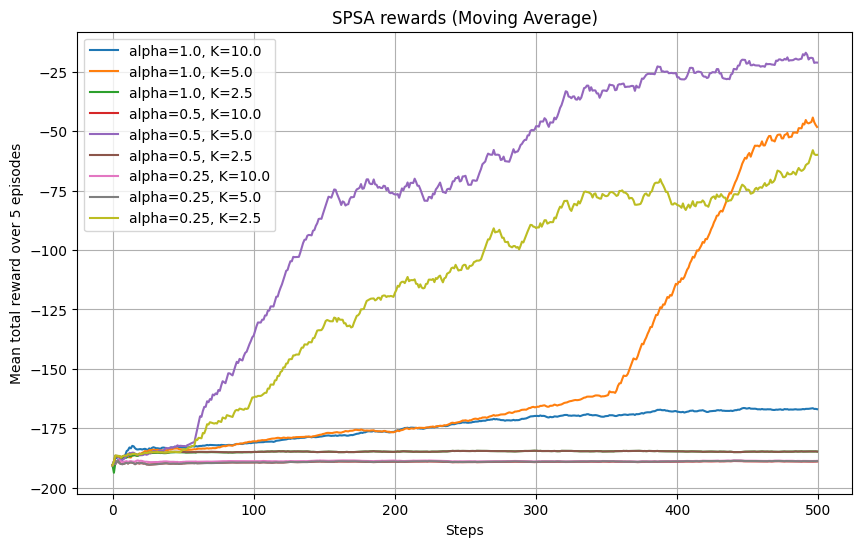

In [34]:
# Plot the results
rl.plot_grid_search(spsa_histories, 'SPSA rewards (Moving Average)', 100)

Unfortunately, despite many attempts, MPGE never learns to reach the goal no matter the hyperparameters used. Run a (time-consuming) grid-search with MPGE to notice that. MPGE only learns to go in one direction.

Here we still try with reasonable parameters alpha=0.5 and K=1.0

In [35]:
iterations = 100 # Takes about the same amount of time as 51 * 100 = 5100 SPSA iterations
alpha = 0.5
K = 1.0

In [36]:
print("Training with Multipoint Gradient Estimator...")
multi_history, multi_best_params = rl.train(multipoint_gradient_estimator, iterations=iterations, alpha_init=alpha, K_init=K)

Training with Multipoint Gradient Estimator...


  0%|          | 0/100 [00:00<?, ?it/s]

Step 0 - New best reward: -186.05
Step 10 - New best reward: -185.72
Step 51 - New best reward: -185.48
Step 60 - New best reward: -184.46


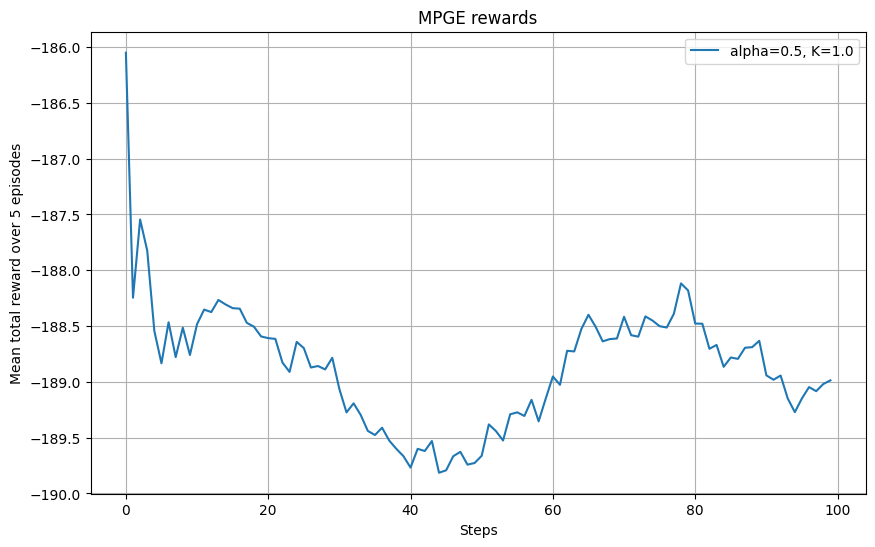

In [37]:
rl.plot_grid_search({(alpha, K): multi_history}, 'MPGE rewards', window_size=20)

In [38]:
# Best SPSA policy visualization
rl.visualize_policy(spsa_best_params[(0.5, 5.0)])

In [39]:
# Best Multipoint Gradient Estimator policy visualization
rl.visualize_policy(multi_best_params)

## 4. Architecture Optimization

In [1]:
import random
import numpy as np
import tensorflow as tf
from NAS_spsa.spsa_NAS import load_wine_data, run_NAS_spsa, final_accuracy, grid_search
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Load the Wine Quality dataset
X_train, X_val, X_test, y_train, y_val, y_test, num_classes = load_wine_data()

2025-06-13 13:07:16.928528: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Grid search architecture benchmark
best_grid_arch, worst_grid_arch = grid_search(X_train, X_val, y_train, y_val, num_classes)
best_grid_acc = final_accuracy(X_train, X_test, y_train, y_test, num_classes, best_grid_arch)
worst_grid_acc= final_accuracy(X_train, X_test, y_train, y_test, num_classes,worst_grid_arch)

print(f"Best Grid Search Architecture {best_grid_arch} : Accuracy {best_grid_acc:.4f}")
print(f"Worst Grid Search Architecture {worst_grid_arch} : Accuracy {worst_grid_acc:.4f}")

Configuration 01: Loss=1.2692, Arch=[32, 32, 0]
Configuration 02: Loss=1.2037, Arch=[32, 32, 64]
Configuration 03: Loss=1.0827, Arch=[32, 32, 128]
Configuration 04: Loss=1.0825, Arch=[32, 32, 256]
Configuration 05: Loss=1.0830, Arch=[32, 64, 0]
Configuration 06: Loss=1.0901, Arch=[32, 64, 64]
Configuration 07: Loss=1.0758, Arch=[32, 64, 128]
Configuration 08: Loss=1.0161, Arch=[32, 64, 256]
Configuration 09: Loss=1.0838, Arch=[32, 128, 0]
Configuration 10: Loss=1.0680, Arch=[32, 128, 64]
Configuration 11: Loss=1.0348, Arch=[32, 128, 128]
Configuration 12: Loss=1.0240, Arch=[32, 128, 256]
Configuration 13: Loss=1.0186, Arch=[32, 256, 0]
Configuration 14: Loss=1.0335, Arch=[32, 256, 64]
Configuration 15: Loss=0.9776, Arch=[32, 256, 128]
Configuration 16: Loss=0.9916, Arch=[32, 256, 256]
Configuration 17: Loss=1.0338, Arch=[32, 512, 0]
Configuration 18: Loss=0.9819, Arch=[32, 512, 64]
Configuration 19: Loss=0.9797, Arch=[32, 512, 128]
Configuration 20: Loss=0.9631, Arch=[32, 512, 256]
Con

Iter 01: Loss=0.9380, Best Loss=0.9380, Arch=[136, 125, 53], Best Arch=[136, 125, 53]
Iter 02: Loss=0.9471, Best Loss=0.9380, Arch=[158, 142, 45], Best Arch=[136, 125, 53]
Iter 03: Loss=0.9509, Best Loss=0.9380, Arch=[196, 177, 52], Best Arch=[136, 125, 53]
Iter 04: Loss=0.9367, Best Loss=0.9367, Arch=[225, 197, 55], Best Arch=[225, 197, 55]
Iter 05: Loss=0.9303, Best Loss=0.9303, Arch=[254, 220, 53], Best Arch=[254, 220, 53]
Iter 06: Loss=0.9251, Best Loss=0.9251, Arch=[275, 237, 51], Best Arch=[275, 237, 51]
Iter 07: Loss=0.9313, Best Loss=0.9251, Arch=[292, 247, 51], Best Arch=[275, 237, 51]
Iter 08: Loss=0.9215, Best Loss=0.9215, Arch=[304, 255, 51], Best Arch=[304, 255, 51]
Iter 09: Loss=0.9170, Best Loss=0.9170, Arch=[316, 263, 52], Best Arch=[316, 263, 52]
Iter 10: Loss=0.9097, Best Loss=0.9097, Arch=[327, 272, 55], Best Arch=[327, 272, 55]
Iter 11: Loss=0.9328, Best Loss=0.9097, Arch=[337, 281, 56], Best Arch=[327, 272, 55]
Iter 12: Loss=0.9114, Best Loss=0.9097, Arch=[347, 289

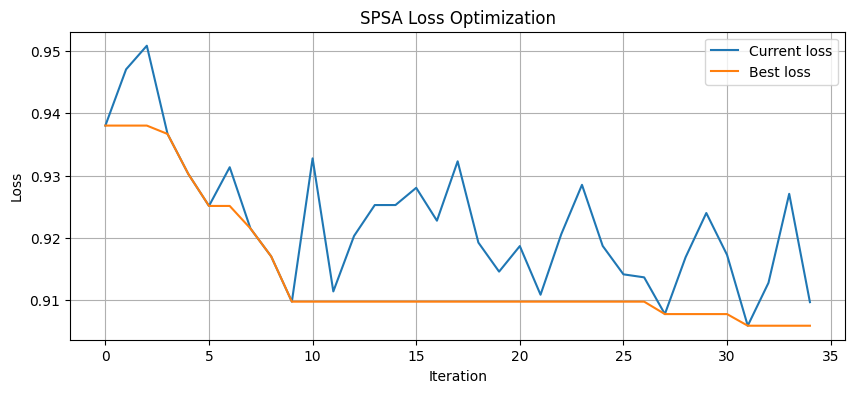

Best architecture: [430, 340, 75]
SPSA Architecture [430, 340, 75] - Accuracy: 0.5938


In [2]:
# Run spsa with small initial layer sizes
best_spsa_arch = run_NAS_spsa(X_train, X_val, y_train, y_val, num_classes, x0=[0.1, 0.1, 0.1], a=0.6, num_iter=35)
print("Best architecture:", best_spsa_arch)
spsa_acc = final_accuracy(X_train, X_test, y_train, y_test, num_classes, best_spsa_arch)
print(f"SPSA Architecture {best_spsa_arch} - Accuracy: {spsa_acc:.4f}")

Iter 01: Loss=0.8937, Best Loss=0.8937, Arch=[541, 541, 263], Best Arch=[541, 541, 263]
Iter 02: Loss=0.8824, Best Loss=0.8824, Arch=[551, 546, 268], Best Arch=[551, 546, 268]
Iter 03: Loss=0.8915, Best Loss=0.8824, Arch=[556, 550, 271], Best Arch=[551, 546, 268]
Iter 04: Loss=0.8956, Best Loss=0.8824, Arch=[560, 552, 274], Best Arch=[551, 546, 268]
Iter 05: Loss=0.8892, Best Loss=0.8824, Arch=[563, 554, 276], Best Arch=[551, 546, 268]
Iter 06: Loss=0.8916, Best Loss=0.8824, Arch=[564, 558, 276], Best Arch=[551, 546, 268]
Iter 07: Loss=0.8851, Best Loss=0.8824, Arch=[565, 562, 276], Best Arch=[551, 546, 268]
Iter 08: Loss=0.8886, Best Loss=0.8824, Arch=[566, 564, 275], Best Arch=[551, 546, 268]
Iter 09: Loss=0.8928, Best Loss=0.8824, Arch=[568, 567, 275], Best Arch=[551, 546, 268]
Iter 10: Loss=0.8858, Best Loss=0.8824, Arch=[570, 570, 275], Best Arch=[551, 546, 268]
Iter 11: Loss=0.8973, Best Loss=0.8824, Arch=[575, 575, 276], Best Arch=[551, 546, 268]
Iter 12: Loss=0.8915, Best Loss=

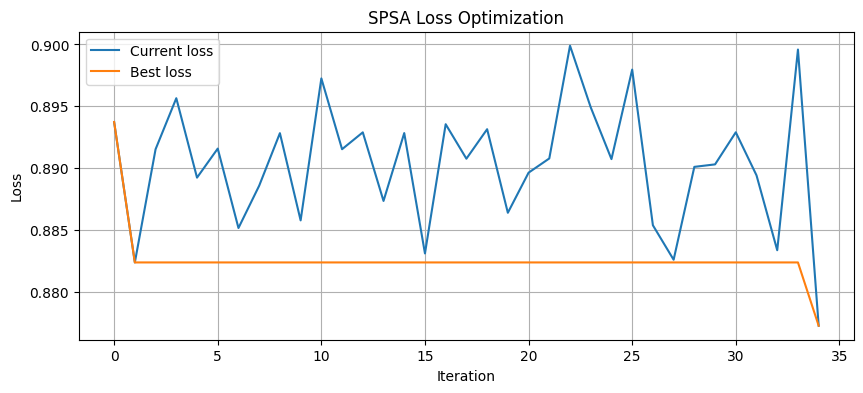

Best architecture: [633, 632, 287]
SPSA Architecture [633, 632, 287] - Accuracy on test set: 0.5750


In [3]:
# Run NAS spsa with with  medium initial layers sizes
best_spsa_arch = run_NAS_spsa(X_train, X_val, y_train, y_val, num_classes, x0=[0.5, 0.5, 0.5], a=0.6, num_iter=35)
print("Best architecture:", best_spsa_arch)
spsa_acc = final_accuracy(X_train, X_test, y_train, y_test, num_classes, best_spsa_arch)
print(f"SPSA Architecture {best_spsa_arch} - Accuracy on test set: {spsa_acc:.4f}")

Iter 01: Loss=0.9374, Best Loss=0.9374, Arch=[138, 138, 54], Best Arch=[138, 138, 54]
Iter 02: Loss=0.9389, Best Loss=0.9374, Arch=[147, 147, 59], Best Arch=[138, 138, 54]
Iter 03: Loss=0.9459, Best Loss=0.9374, Arch=[152, 152, 62], Best Arch=[138, 138, 54]
Iter 04: Loss=0.9357, Best Loss=0.9357, Arch=[159, 159, 65], Best Arch=[159, 159, 65]
Iter 05: Loss=0.9360, Best Loss=0.9357, Arch=[168, 167, 70], Best Arch=[159, 159, 65]
Iter 06: Loss=0.9358, Best Loss=0.9357, Arch=[174, 174, 73], Best Arch=[159, 159, 65]
Iter 07: Loss=0.9527, Best Loss=0.9357, Arch=[180, 179, 75], Best Arch=[159, 159, 65]
Iter 08: Loss=0.9320, Best Loss=0.9320, Arch=[187, 187, 78], Best Arch=[187, 187, 78]
Iter 09: Loss=0.9403, Best Loss=0.9320, Arch=[196, 195, 81], Best Arch=[187, 187, 78]
Iter 10: Loss=0.9380, Best Loss=0.9320, Arch=[202, 201, 84], Best Arch=[187, 187, 78]
Iter 11: Loss=0.9400, Best Loss=0.9320, Arch=[210, 202, 88], Best Arch=[187, 187, 78]
Iter 12: Loss=0.9316, Best Loss=0.9316, Arch=[215, 203

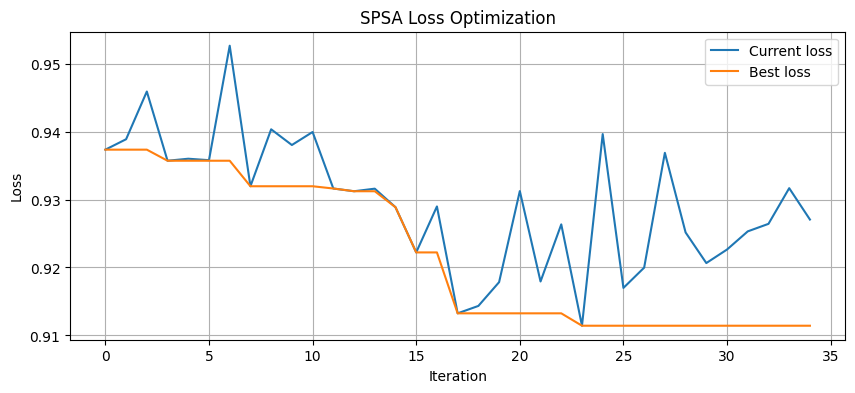

Best architecture: [237, 213, 107]
SPSA Architecture [237, 213, 107] - Accuracy on test set: 0.5813


In [4]:
# Run NAS spsa with small initial layer sizes and small step size
best_spsa_arch = run_NAS_spsa(X_train, X_val, y_train, y_val, num_classes, x0=[0.1, 0.1, 0.1], a=0.1, num_iter=35)
print("Best architecture:", best_spsa_arch)
spsa_acc = final_accuracy(X_train, X_test, y_train, y_test, num_classes, best_spsa_arch)
print(f"SPSA Architecture {best_spsa_arch} - Accuracy on test set: {spsa_acc:.4f}")

Iter 01: Loss=0.8874, Best Loss=0.8874, Arch=[822, 828, 411], Best Arch=[822, 828, 411]
Iter 02: Loss=0.8798, Best Loss=0.8798, Arch=[819, 831, 412], Best Arch=[819, 831, 412]
Iter 03: Loss=0.8839, Best Loss=0.8798, Arch=[819, 831, 412], Best Arch=[819, 831, 412]
Iter 04: Loss=0.8768, Best Loss=0.8768, Arch=[818, 830, 413], Best Arch=[818, 830, 413]
Iter 05: Loss=0.8945, Best Loss=0.8768, Arch=[818, 828, 413], Best Arch=[818, 830, 413]
Iter 06: Loss=0.8828, Best Loss=0.8768, Arch=[818, 827, 413], Best Arch=[818, 830, 413]
Iter 07: Loss=0.8910, Best Loss=0.8768, Arch=[816, 827, 414], Best Arch=[818, 830, 413]
Iter 08: Loss=0.8876, Best Loss=0.8768, Arch=[816, 828, 414], Best Arch=[818, 830, 413]
Iter 09: Loss=0.8891, Best Loss=0.8768, Arch=[815, 830, 413], Best Arch=[818, 830, 413]
Iter 10: Loss=0.8928, Best Loss=0.8768, Arch=[814, 832, 412], Best Arch=[818, 830, 413]
Iter 11: Loss=0.8691, Best Loss=0.8691, Arch=[813, 833, 412], Best Arch=[813, 833, 412]
Iter 12: Loss=0.8762, Best Loss=

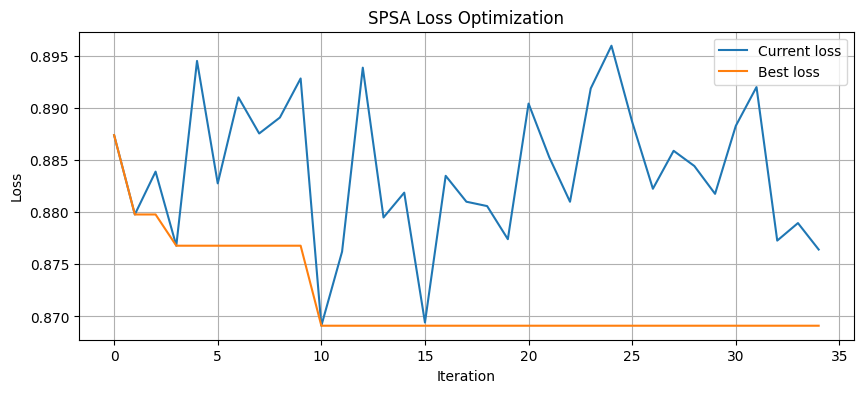

Best architecture: [813, 833, 412]
SPSA Architecture [813, 833, 412] - Accuracy on test set : 0.6062


In [5]:
# Run NAS spsa with large initial layer sizes 
best_spsa_arch = run_NAS_spsa(X_train, X_val, y_train, y_val, num_classes, x0=[0.8, 0.8, 0.8], a=0.6, num_iter=35)
print("Best architecture:", best_spsa_arch)
spsa_acc = final_accuracy(X_train, X_test, y_train, y_test, num_classes, best_spsa_arch)
print(f"SPSA Architecture {best_spsa_arch} - Accuracy on test set : {spsa_acc:.4f}")